In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Experimental setting parameters
N_subject = 4
N_game = 4

Subject_names = ['01', '02', '03', '04']
Game_names = ['1', '2', '3', '4']

Chars_zero = ['M', 'N']
Chars_one = ['F', 'Y']

if len(Subject_names) != N_subject:
    print('Subject list error!')
if len(Game_names) != N_game:
    print('Game list error!')


In [3]:
# Read EEG data from csv
def read_EEG_data(subject, game):
    data = pd.read_csv('GAMEEMO/(S' + subject + ')/Preprocessed EEG Data/.csv format/' + 'S' + subject + 'G' + game + 'AllChannels.csv')
    return data

# Read behavioural data from csv
def read_bhvl_data(subject, game):
    data = pd.read_csv('GameLabels.csv')
    data_temp = data.loc[data['subject'] == int(subject)]
    return data_temp.loc[data_temp['game'] == int(game)]

# Write summarised data to csv
def write_smry_data(subject, game, data):
    data.to_csv('Summarised_Data/' + 'S' + subject + 'G' + game + '.csv')

# Convert to numerical value
def convert_value(value):
    if type(value) == type('a'):
        if value in Chars_zero:
            return 0
        if value in Chars_one:
            return 1
    return value
    

In [4]:
# Summarised data table
Smry_data = [ [ [] for j in range(N_game) ] for j in range(N_subject) ]

EEG_columns = list(read_EEG_data(Subject_names[0], Game_names[0]).columns[:-1])
Bhvl_columns = list(read_bhvl_data(Subject_names[0], Game_names[0]).columns[2:])
Smry_column = ['subject', 'game'] + EEG_columns + Bhvl_columns
print('Columns:', Smry_column)


Columns: ['subject', 'game', 'AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8', 'gender', 'age', 'disturbance', 'experience', 'memory', 'satisfied', 'boring', 'horrible', 'calm', 'funny', 'valence', 'arounsal']


In [5]:
# EEG & behavioural data processing
for i_subject in range(N_subject):
    subject = Subject_names[i_subject]
    for i_game in range(N_game):
        game = Game_names[i_game]
        
        # Dataframe initialisation
        Temp_data = pd.DataFrame(columns = Smry_column)
        Temp_data.index.name = 'time'
        
        # EEG data processing
        EEG_data = read_EEG_data(subject, game).drop(columns = ['Unnamed: 14'])
        for column in EEG_data.columns:
            Temp_data[column] = EEG_data[column]
        
        # Behavioural data processing
        Bhvl_data = read_bhvl_data(subject, game)
        for column in Bhvl_data.columns:
            Temp_data[column] = convert_value(Bhvl_data[column].iloc[0]) * np.ones([Temp_data.shape[0], 1], dtype = 'int')
        
        # Dataframe summarization
        Smry_data[i_subject][i_game] = Temp_data
        write_smry_data(subject, game, Smry_data[i_subject][i_game])
        

Subject: 01   Game: 1
Shape: (38252, 28)
      subject  game      AF3      AF4       F3       F4       F7        F8  \
time                                                                         
0           1     1 -33.0205 -15.1846 -42.1795   1.6872  42.1793  -1.68720   
1           1     1 -28.6291 -20.0583 -42.5410 -10.4653  35.3100 -15.68600   
2           1     1 -21.8497 -10.9006 -32.0346  -2.3656  39.6993  -0.64483   
3           1     1 -25.1185 -10.9702 -32.7641  -3.4287  32.7378   4.69650   
4           1     1 -19.0316  -9.5886 -29.1108  -3.9459  35.3533   0.79929   

          FC5     FC6  ...  disturbance  experience  memory  satisfied  \
time                   ...                                               
0     -5.5436 -3.6154  ...            0           0       0          2   
1    -19.3110 -2.4344  ...            0           0       0          2   
2     -4.0523 -1.0830  ...            0           0       0          2   
3     -8.6299 -1.7412  ...            0   

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

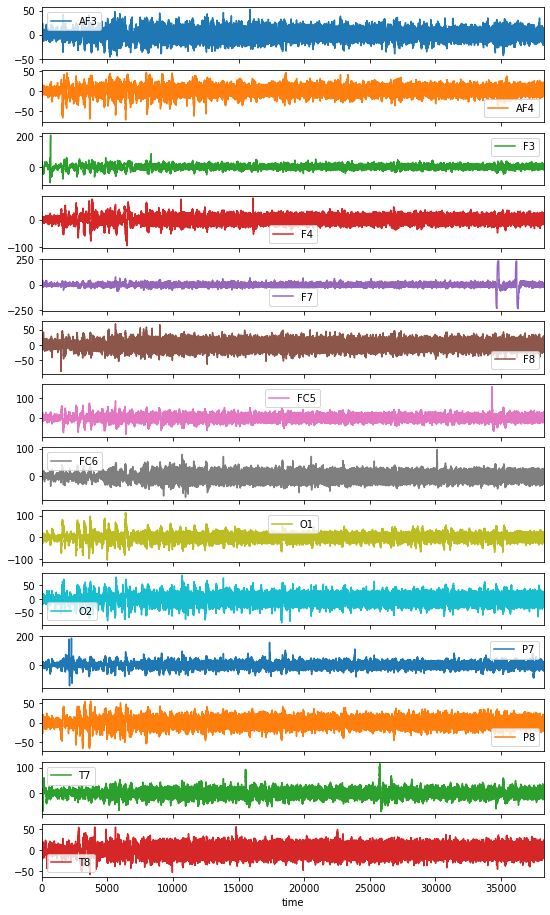

In [7]:
# Read and show summarised data for validation
subject, game = '01', '1'
show_smry_data = pd.read_csv('Summarised_Data/' + 'S' + subject + 'G' + game + '.csv', index_col = ['time'])
print('Subject:', subject, '  Game:', game)
print('Shape:', show_smry_data.shape)
print(show_smry_data.head())
show_smry_data[EEG_columns].plot(subplots = True, figsize = (9, 16), xlim = [show_smry_data.index[0], show_smry_data.index[-1]])
